Confusion Matrix:
[[112  34]
 [ 41  44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       146
           1       0.56      0.52      0.54        85

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231

Accuracy: 0.6753246753246753


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/externals/six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


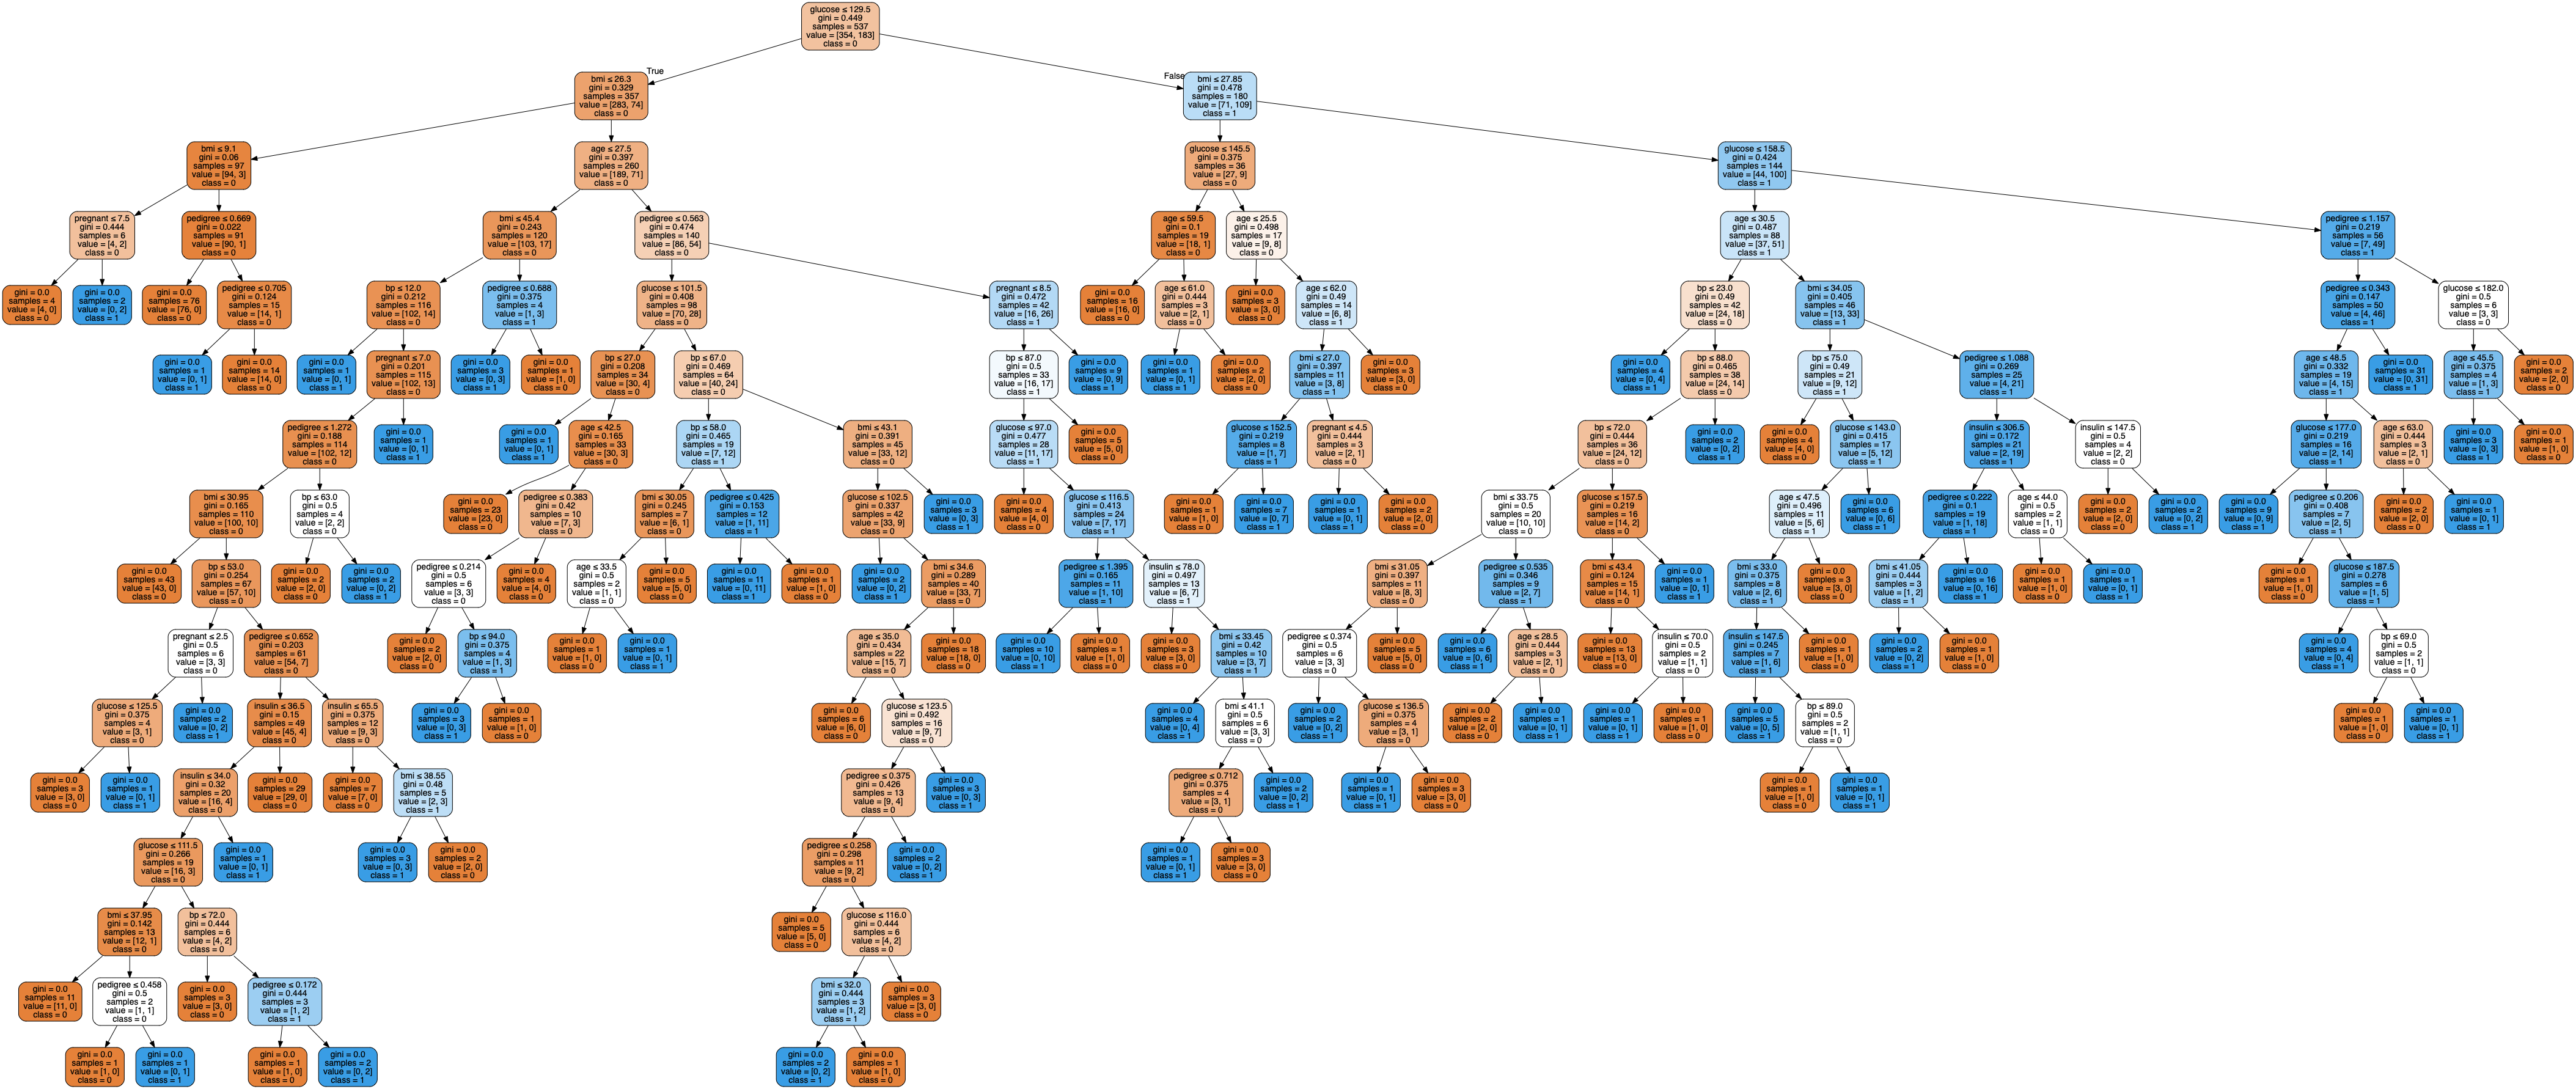

In [1]:
#Decision Tree classifier on Pima Indian Diabetes
#Import Pandas library & the decision tree module from sklearn & train, test split module from sklearn

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Load data set
#Since the csv does not have column names, assign them names as below. Print to see the table
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(r"pima-indians-diabetes.csv", header = None, names = col_names)
pima.head()

#Split dataset into features & target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

#Divide the data into 70% training data and 30% testing data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#Train the data with decision tree classifier module of sklearn
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

#Make prediction
y_pred = clf.predict(X_test)

#get the accuracy score, confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

#Visualisation of the above results & draw the decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
   special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())
